# Approximation Formula

In [1]:
using DifferentialEquations, Plots, Plots.PlotMeasures
pyplot()

Plots.PyPlotBackend()

## Utility functions

In [2]:
# change plot fonts
bplot(p, s) = plot!(p, titlefont=font(s, "Times"), xguidefontsize=s-4
    , ytickfont=font(s-4, "Times"), margin=8mm, yguidefontsize=s-4
    , xtickfont = font(s-4, "Times"), legendfont = font(s-4, "Times"))

# this function will generate a T period of social distancing at time t0
sinput(t, ts, td) = if (t-ts<0 || t-ts-td>0) 0 else 1 end

sinput (generic function with 1 method)

# $SIR$ 

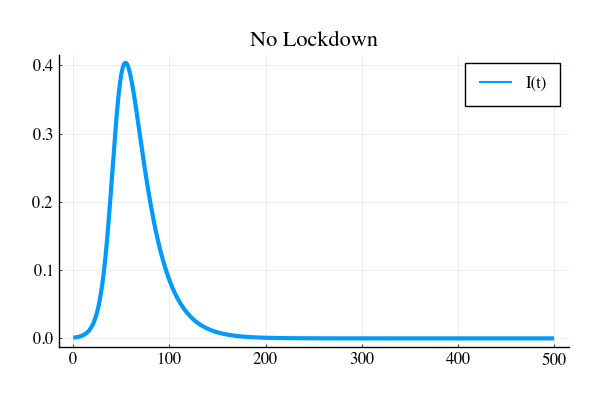

In [3]:
# model description
function SIR(dx,x,p,t)
    β, βl, γ, ts, td = p
    u = β - (β-βl).*sinput(t, ts, td)
    dx[1] = -u*x[1]*x[2]
    dx[2] = u*x[1]*x[2] - γ*x[2]
    dx[3] = γ*x[2]
end

β, βl, γ, ts, td  = [0.2,0.02,0.05,0,0]         # parameters
u0   = [1-1e-3,1e-3, 0.0]            # define initial values
p    = [β, βl, γ, ts, td]
tspn = (0., 500.)        
prob = ODEProblem(SIR, u0, tspn, p)            # no lockdown
nlck = solve(prob, BS3(), reltol=1e-8,         
    abstol=1e-8, saveat=1e-2)
v    = maximum(nlck[2,:])                     # virtual peak
vind = argmax(nlck[2,:])

p = plot(nlck.t, nlck[2,:], title="No Lockdown" 
              , linewidth=3, label="I(t)")
p = bplot(p, 16)

# Test for different lockdown contact rates $\beta l$

In [4]:
function test(βl, model)
    β, γ, ts, td  = [0.2,0.05,0,0]   
    u0   = [1-1e-3,1e-3, 0.0] 
    p    = [β, βl, γ, ts, td]
    tspn = (0., 1000.)  
    
    prob = ODEProblem(model, u0, tspn, p)            # no lockdown
    nlck = solve(prob, BS3(), reltol=1e-8,         
        abstol=1e-8, saveat=1e-2)
    v    = maximum(nlck[2,:])                       # virtual peak
    vind = argmax(nlck[2,:])
    
    maxduration = 50
    A = zeros(maxduration,1)
    N = zeros(maxduration,1)
    
    for td = 1:maxduration
        Is  = v/(2-exp(-γ*td)) 
        ts  = nlck.t[argmin(abs.(nlck[2,1:vind].-Is))]
        p[4:5] = [ts, td]
        prob = ODEProblem(model, u0, tspn, p)
        appx = solve(prob, BS3(), reltol=1e-8         
                         , abstol=1e-8, saveat=1e-2)
        app  = maximum(appx[2,:])        
        tsr  = ts-maxduration:0.1:ts+maxduration
        data = zeros(size(tsr,1))
        
        for i=1:size(tsr,1)
            p[4] = tsr[i]
            prob = ODEProblem(model, u0, tspn, p)
            sol  = solve(prob, BS3(), reltol=1e-8, 
                abstol=1e-8, saveat=1e-2)
            data[i,1] = maximum(sol[2,:])
        end
        A[td] = app
        N[td] = minimum(data)
    end
    
    p = plot(1:maxduration, A, label="Approximation", 
        ylabel="Infected Peak", linewidth=3, 
        title="β lockdown="*string(βl))
    p = plot!(1:maxduration, N, label="Optimal Lockdown", 
        linewidth=3, linestyle=:dash, xlabel="Lockdown Duration")
    p = bplot(p, 16)
    
    savefig(p, "figures/app_"*string(βl)*".png")
    savefig(p, "figures/app_"*string(βl)*".svg")
end

test (generic function with 1 method)

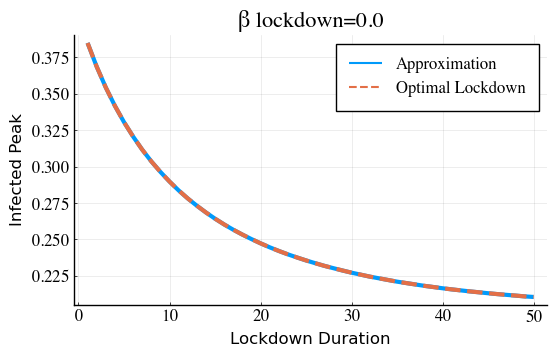

In [5]:
test(0.00,SIR)

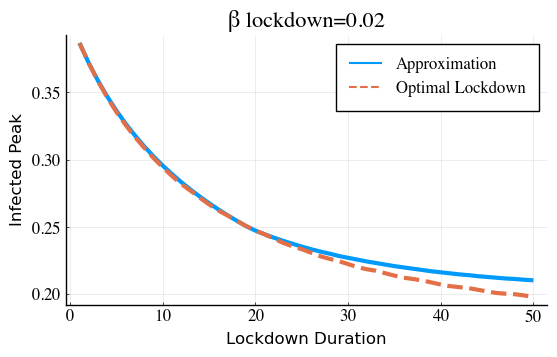

In [6]:
test(0.02,SIR)

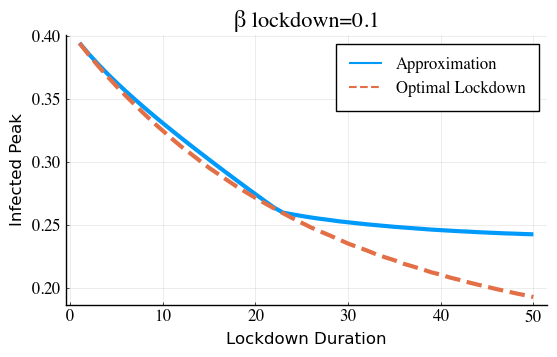

In [7]:
test(0.10,SIR)

# Provenance

In [8]:
using Dates
println("mahdiar")
Dates.format(now(), "Y/U/d HH:MM")  

mahdiar


"2021/April/5 22:05"